# EDA. Dataset: The 20 newsgroups text dataset

https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

df_train = pd.DataFrame({'text': newsgroups_train.data, 'label': newsgroups_train.target})
df_test = pd.DataFrame({'text': newsgroups_test.data, 'label': newsgroups_test.target})

In [ ]:
metrics = {
    'train': [len(df_train), df_train['label'].nunique()],
    'test': [len(df_test), df_test['label'].nunique()]
}

index = ['Number of rows', 'Unique clusters']

pd.DataFrame(metrics, index=index)

,train,test
Number of rows,11314,7532
Unique clusters,20,20


In [57]:
label_counts_train = df_train['label'].value_counts().sort_index()
label_counts_test = df_test['label'].value_counts().sort_index()

pd.DataFrame({ 'train, %': label_counts_train/len(df_train)*100, 'test, %': label_counts_test/len(df_test)*100 }, index=label_counts_test.index)


,"train, %","test, %"
label,,
0,4.242531,4.235263
1,5.161747,5.164631
2,5.223617,5.231014
3,5.214778,5.204461
4,5.108715,5.111524
5,5.241294,5.244291
6,5.170585,5.177908
7,5.250133,5.257568
8,5.285487,5.284121


Train and test subsets are almost evenly distributed across clusters. 

### Texts analysis

In [56]:
text_length_train = df_train['text'].apply(len)
text_length_test = df_test['text'].apply(len)
print("Text lengths")
pd.DataFrame({ 'train': text_length_train, 'test': text_length_test })
# NaN values in test is because test dataset is smaller than train

Text lengths


,train,test
0,475,459.0
1,530,539.0
2,1659,17.0
3,95,3879.0
4,448,97.0
...,...,...
11309,1782,NaN
11310,674,NaN
11311,581,NaN
11312,311,NaN


In [33]:
# train
text_length_train.describe()

count    11314.000000
mean      1218.135496
std       4038.256477
min          0.000000
25%        237.000000
50%        491.000000
75%        984.750000
max      74878.000000
Name: text, dtype: float64

In [34]:
# test
text_length_test.describe()

count      7532.000000
mean       1096.862586
std        3571.221784
min           0.000000
25%         230.000000
50%         483.500000
75%         967.250000
max      158791.000000
Name: text, dtype: float64

In [ ]:
def tokenize(text):
    """
    Tokenize single text example:
        remove punctruation and lowercase
        split by spaces
        remove stopwords
    """
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    tokens = text.split()  # Simple split by spaces
    tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]  # Remove stopwords
    return tokens

tokens_train = df_train['text'].apply(tokenize)
all_words_train = [word for words in tokens_train for word in words]
tokens_test = df_test['text'].apply(tokenize)
all_words_test = [word for words in tokens_test for word in words]
unigram_counts_train = Counter(all_words_train).most_common(15)
unigram_counts_test = Counter(all_words_test).most_common(15)

print("Most common words in train dataset:")
pd.DataFrame(unigram_counts_train, columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

Most common words in train dataset:


,Word,Count
0,x,5086
1,1,4660
2,people,3996
3,like,3882
4,dont,3861
5,just,3743
6,know,3477
7,2,3453
8,maxaxaxaxaxaxaxaxaxaxaxaxaxaxax,3307
9,use,3158


In [46]:
print("Most common words in test dataset:")
pd.DataFrame(unigram_counts_test, columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

Most common words in test dataset:


,Word,Count
0,1,2816
1,dont,2570
2,like,2505
3,just,2407
4,2,2397
5,people,2297
6,know,2264
7,0,2264
8,think,1982
9,use,1827


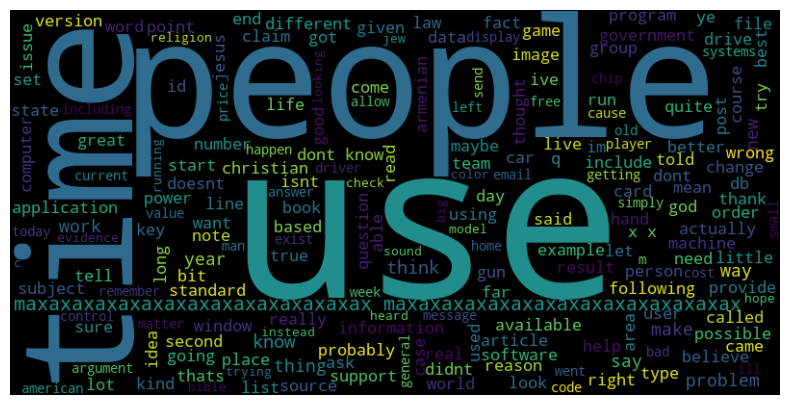

In [ ]:
print("Train subset:")
wordcloud = WordCloud(width=800, height=400).generate(' '.join(all_words_train))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Test subset:


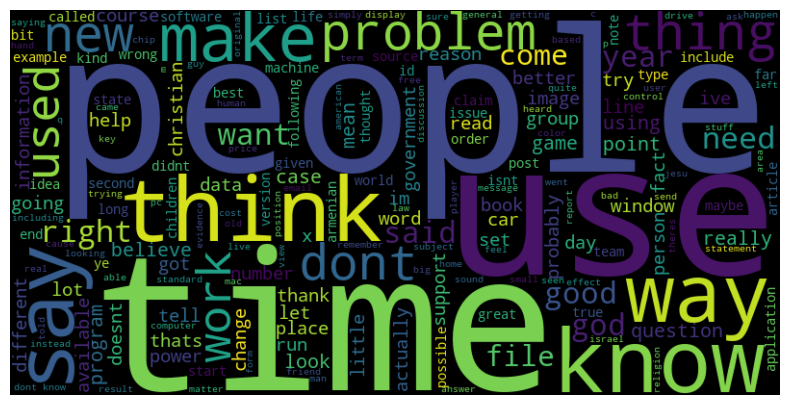

In [51]:
print("Test subset:")
wordcloud = WordCloud(width=800, height=400).generate(' '.join(all_words_test))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Subsets have quite similar distribution in terms of words usage. Most common words are almost identical in both subsets.

In [ ]:
analyzer = SentimentIntensityAnalyzer()
sentiment_train = df_train['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
sentiment_test = df_test['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
print("Train subset sentiment:")
sentiment_train.describe()

Train subset sentiment:


count    11314.000000
mean         0.265514
std          0.632465
min         -0.999900
25%         -0.153100
50%          0.440400
75%          0.842200
max          1.000000
Name: text, dtype: float64

In [55]:
print("Test subset sentiment:")
sentiment_test.describe()

Test subset sentiment:


count    7532.000000
mean        0.238228
std         0.636903
min        -0.999900
25%        -0.226300
50%         0.401900
75%         0.826250
max         1.000000
Name: text, dtype: float64

Generally, most of the texts are either netral or positive. Less than 25% of the dataset have negative sentiment. Mean sentiment for both train and test is nuetral (0.2)